# Sentiment Analysis Using Python(Keras)

## What is Sentiment Analysis?
    

Sentiment Analysis is the interpretation and classification of emotions from a text data using text analysis techniques. It a text analysis technique that detects polarity(positive or negative) in a piece of text, paragraph or a complete document.

Understanding people's emotion is important for business to understand their customers' opinion about them. It is not feasible for a person to go through hundreds of reviews to understand their customers thoughts and feelings. Therefore, using sentiment analysis to automatically analyze reviews about your product could help you discover if customers are happy about your pricing, customer service or other services.

Sentiment analysis models focus on polarity (positive, negative, neutral) but also on feelings and emotions (angry, happy, sad, etc), and even on intentions (e.g. interested v. not interested).

## Why Perform Sentiment Analysis?

According to [IBM](https://www.ibm.com/blogs/watson/2016/05/biggest-data-challenges-might-not-even-know/), it is estimated that 80% of the world’s data is unstructured, but businesses are only able to gain visibility into a portion of that data.

Huge volumes of text data (emails, support tickets, chats, social media conversations, surveys, articles, documents, etc), is created every day but it’s hard to analyze, understand, and sort through, not to mention time-consuming and expensive.

Sentiment analysis, however, helps businesses make sense of all this unstructured text by automatically tagging it.

### Benefits of Sentiment Analysis
* **Sorting Data at Scale:** As mentioned earlier it is not possible to manually sort through thousands of tweets, customer support conversations, or surveys. There’s just too much data to process manually. Sentiment analysis helps businesses process huge amounts of data in an efficient and cost-effective way.<br><br>  

* **Real-Time Analysis Sentiment analysis:** All of support tickets can be analysed using sentiment analysis and can be prioritized accordingly. They can analyze critical issues in real time without any external help so you can take action right away.<br><br>

* **Consistent criteria:** It’s estimated that people only agree around 60-65% of the time when determining the sentiment of a particular text. Tagging text by sentiment is highly subjective, influenced by personal experiences, thoughts, and beliefs. By using a centralized sentiment analysis system, companies can apply the same criteria to all of their data, helping them improve accuracy and gain better insights.


![How Sentiment Analysis Works](./sentiment_analysis.jpeg)

### The Training and Prediction Processes

In the **training process** our model learns to associate a particular text to the corresponding sentiment(positive or negative) based on sample data used for training our algorithm. A feature extractor converts the text to a feature vector. This feature vector along with its tag(positive or negative) is fed to the machine learning algorithm to generate a model.  
<br>In the **predicition process** the feature extractor is used to transform the unseen text that has to be analyzed into a feture vector using the same feature extractor used during the training process. This feature vector is fed into the model which then predicts the sentiment of the text

### Feature Extraction from Text


The classification step usually involves a statistical model like Naïve Bayes, Logistic Regression, Support Vector Machines, or Neural Networks.<br>
In this project we will be using **Deep Learning** to train a **Neural Network** to classify the text for us. To create this Neural Network in Python we'll be using the **Keras** Library.  
**Keras** is a deep learning and neural networks API by François Chollet which is capable of running on top of Tensorflow (Google), Theano or CNTK (Microsoft). It is a great way to start experimenting with neural networks without having to implement every layer and piece on your own. For example Tensorflow is a great machine learning library, but you have to implement a lot of boilerplate code to have a model running.

## Getting Started

The dataset used in this project is the [Sentiment Labelled Sentences Data Set from the UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences) which includes labelled reviews from Amazon, Yelp and IMDB. Each review is classified as 1 if it has a positive sentiment or 0 if it has a negative sentiment. We download this dataset and extract it into a `data` folder and load it into out program using `Pandas`. 
The collection of text is known as a **Corpus** in Natual Language Processing. **Vocabulary** is the set of words that occur in our text where each word has its own index. This enables us to create a vector for our sentences

In [4]:
import pandas as pd
data_path = {
    'amzn': './data/amazon_cells_labelled.txt',
    'imdb': './data/imdb_labelled.txt',
    'yelp': './data/yelp_labelled.txt'
} 

df_list = []
for source, filepath in data_path.items():
    df = pd.read_csv(filepath,names = ['sentence','label'],sep = '\t') # Reading each dataset as a pandas dataframe.
    df_list.append(df)
    
df = pd.concat(df_list) #Concatenate pandas objects along a particular axis with optional set logic along the other axes.
df.head()

,sentence,label
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


## What is a Word Embedding?

This method represents words as dense word vectors (also called word embeddings) which are trained. This means that the word embeddings collect more information into fewer dimensions. The word embeddings do not understand the text as a human would, but they rather map the statistical structure of the language used in the corpus. Their aim is to map semantic meaning into a geometric space. This geometric space is then called the **embedding space**.  
This would map semantically similar words close on the embedding space like numbers or colors. We can either train our own word embeddings or use pre-trained models which we can directly use in our models. 

In [8]:
from keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split

sentences = df['sentence'].values
labels = df['label'].values

sentences_train, sentences_test, y_train, y_test = train_test_split(sentences, labels, test_size=0.25, random_state=1000)

tokenizer = Tokenizer(num_words = 5000)
tokenizer.fit_on_texts(sentences)

sentences_train, sentences_val, y_train, y_val = train_test_split(sentences_train, y_train, test_size=0.25, random_state=1000)

X_train = tokenizer.texts_to_sequences(sentences_train)
X_val = tokenizer.texts_to_sequences(sentences_val)
X_test = tokenizer.texts_to_sequences(sentences_test)

vocab_size = len(tokenizer.word_index) + 1

print(sentences_test[0])
print(X_train[0])
print(y_train[0])

Earbud piece breaks easily.
[429, 230]
0


The indexing is ordered after the most common words in the text, which you can see by the word the having the index 1. It is important to note that the index 0 is reserved and is not assigned to any word. This zero index is used for padding. One problem that we have is that each text sequence has in most cases different length of words. To counter this, you can use `pad_sequence()` which simply pads the sequence of words with zeros. Additionally you would want to add a `maxlen` parameter to specify how long the sequences should be. This cuts sequences that exceed that number.

In [11]:
from keras.preprocessing.sequence import pad_sequences

maxlen = 100

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)
X_val = pad_sequences(X_val,padding = 'post', maxlen=maxlen)

print(X_train[0])

[429 230   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0]


Till this point, our data is still hardcoded. Now using Keras we will be creating an embedding layer which will take the previously calculated integers and maps them to a dense vector of the embedding.

In [154]:
from keras.models import Sequential
from keras.layers import Embedding, Dense, GlobalMaxPool1D

embedding_dim = 64

model = Sequential()
model.add(Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))
model.add(GlobalAveragePooling1D())
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_45"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_38 (Embedding)     (None, 100, 64)           337408    
_________________________________________________________________
global_average_pooling1d_33  (None, 64)                0         
_________________________________________________________________
dense_90 (Dense)             (None, 8)                 520       
_________________________________________________________________
dense_91 (Dense)             (None, 1)                 9         
Total params: 337,937
Trainable params: 337,937
Non-trainable params: 0
_________________________________________________________________


The weights of the embedding layer are initialized with random weights and are then adjusted through backpropagation during training. This model takes the words as they come in the order of the sentences as input vectors.

In [155]:
history = model.fit(X_train, y_train,
                    epochs=10,
                    verbose=False,
                    validation_data=(X_val, y_val),
                    batch_size=5)

loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print(f"Testing Accuracy:  {accuracy}")
loss, accuracy = model.evaluate(X_val,y_val,verbose=False)
print(f"Validation Accuracy:  {accuracy}")

Testing Accuracy:  0.8151382803916931
Validation Accuracy:  0.8081395626068115


In [145]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

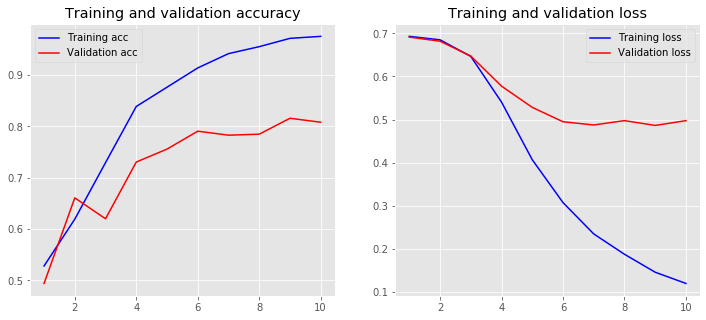

In [156]:
plot_history(history)